Hand-In of Group 13, Jonathan Ehrengruber (jonathan.ehrengruber@students.fhnw.ch), Christian Renold (christian.renold@hslu.ch)

# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2.

Other content in this notebook:
* [Exercise 2](#ex02)
* [Exercise 3](#ex03)

## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils

%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

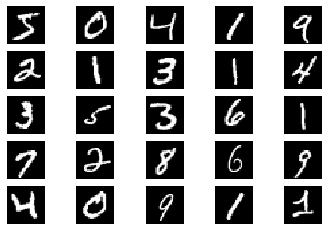

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

show_imgs(X_train)

In [4]:
X_train =  X_train.reshape(60000, 784)
X_test =   X_test.reshape(10000, 784)
X_train =  X_train.astype('float32')
X_test =   X_test.astype('float32')
X_train /= 255.0
X_test /=  255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [6]:
E = 10                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

model = Sequential([
    Dense(units=n_classes, input_shape=(D,), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [7]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
log = model.fit(X_train, Y_train, epochs=E, batch_size=B, validation_data=(X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5974 - accuracy: 0.8535 - val_loss: 0.3410 - val_accuracy: 0.9087
Epoch 2/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3303 - accuracy: 0.9092 - val_loss: 0.3010 - val_accuracy: 0.9167
Epoch 3/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3015 - accuracy: 0.9163 - val_loss: 0.2852 - val_accuracy: 0.9216
Epoch 4/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2882 - accuracy: 0.9194 - val_loss: 0.2783 - val_accuracy: 0.9233
Epoch 5/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2802 - accuracy: 0.9216 - val_loss: 0.2736 - val_accuracy: 0.9241
Epoch 6/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2746 - accuracy: 0.9239 - val_loss: 0.2717 - val_accuracy: 0.9255
Epoch 7/10
60000/60000 [==============================] 

In [8]:
# Evaluate the network

# We can do this at three levels: 
# (1) plot of the loss during the training phase 
# (2) overall accuracy evaluation on test set
# (3) per class evaluation with confusion matrix on test set.
# Loss evolution during training
# This can be done first looking at the history of the training (output of the `fit()` function).

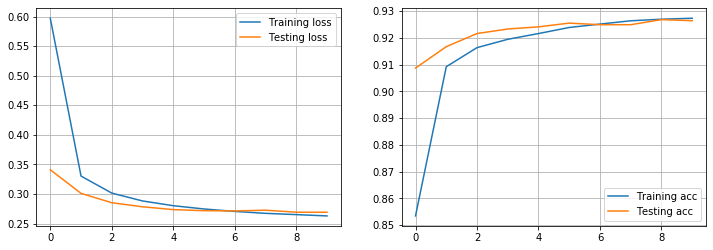

In [9]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [10]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.2691174924507737
Test accuracy: 0.9264


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [11]:
pred = model.predict_classes(X_test, verbose=0)
confusion_matrix(y_test, pred)

array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    9,  918,   17,    6,    6,   13,   12,   43,    3],
       [   3,    0,   18,  917,    1,   29,    2,   11,   23,    6],
       [   2,    1,    4,    3,  915,    0,   11,    4,   11,   31],
       [   8,    3,    2,   22,    7,  796,   14,    6,   29,    5],
       [   8,    3,    6,    1,    7,   17,  911,    2,    3,    0],
       [   1,    7,   20,    7,    6,    0,    0,  957,    5,   25],
       [   7,    9,    5,   21,    9,   30,    9,   13,  866,    5],
       [  10,    7,    1,   10,   28,    8,    0,   33,    7,  905]])

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(784, 10)
(10,)


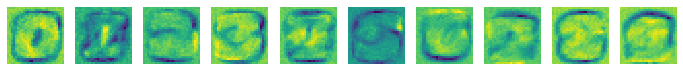

In [12]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:, i]
    im = im.reshape(28, 28)
    
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    minv = im.min()
    maxv = im.max()
    im = (im - minv) / (maxv - minv) * 255
    im = im.round().astype(int)
    ax.axis('off')
    ax.imshow(im)

<a id='ex02'></a>

## Exercise 2

In [3]:
from tensorflow.keras.datasets import cifar10

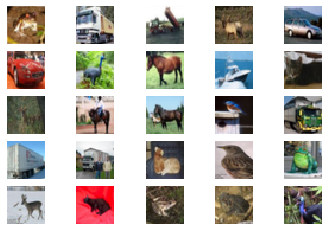

Class count 10
(50000, 32, 32, 3)


In [4]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k])
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

show_imgs(X_train)

n_classes = np.unique(y_train).shape[0]
print('Class count {}'.format(n_classes))
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])
Y_train, Y_test = utils.to_categorical(y_train, n_classes), utils.to_categorical(y_test, n_classes)

In [5]:
X_train.shape

(50000, 3072)

In [7]:
from tensorflow.keras.regularizers import l2

In [8]:
E = 5                # number of epochs
B = 128              # batch size
D = X_train.shape[1] # dimension of input sample - 784 for MNIST

model = Sequential([
    Dense(units=n_classes, input_shape=(D,), activation='softmax', kernel_regularizer=l2(.05))
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


There are three different regularizers available (kernel, bias and activity). According to
* https://keras.io/regularizers/ and 
* https://stats.stackexchange.com/questions/383310/difference-between-kernel-bias-and-activity-regulizers-in-keras

we used a `kernel_regularizer` because we want to reduce the saturation of the weights.

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=E, batch_size=B)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s 33us/sample - loss: 2.3183 - accuracy: 0.3012 - val_loss: 2.0711 - val_accuracy: 0.2984
Epoch 2/5
50000/50000 [==============================] - 1s 23us/sample - loss: 1.9937 - accuracy: 0.3300 - val_loss: 1.9689 - val_accuracy: 0.3370
Epoch 3/5
50000/50000 [==============================] - 1s 23us/sample - loss: 1.9888 - accuracy: 0.3285 - val_loss: 1.9654 - val_accuracy: 0.3514
Epoch 4/5
50000/50000 [==============================] - 1s 22us/sample - loss: 1.9856 - accuracy: 0.3338 - val_loss: 1.9649 - val_accuracy: 0.3413
Epoch 5/5
50000/50000 [==============================] - 1s 22us/sample - loss: 1.9862 - accuracy: 0.3331 - val_loss: 1.9945 - val_accuracy: 0.3169


In [21]:
def plot_log(log_local):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(log_local.history['loss'], label='Training loss')
    ax1.plot(log_local.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(log_local.history['accuracy'], label='Training acc')
    ax2.plot(log_local.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()

### Loss evolution during training

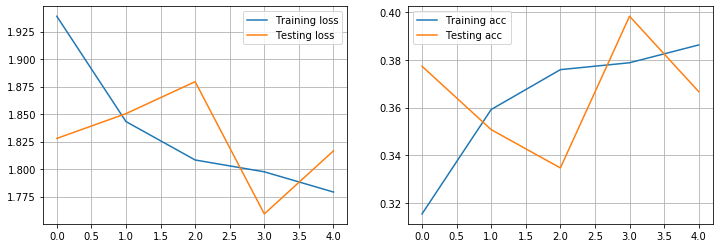

In [45]:
plot_log(log)

### Model evaluation

In [12]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.9944595724105836
Test accuracy: 0.3169


### Plot the weights

In [13]:
def plot_weights_normalized_globally(wng):
    f = plt.figure(figsize=(12,12))
    for i in range(10):
        ax = f.add_subplot(1, 10, 1+i)
        im = wng[:, i] # get the weights landing to neuron i
        im = im.reshape(32,32,3) # reshape the vector of weights into 32x32x3 image
        # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
        min = im.min() # get the min of im
        max = im.max() # get the max of im
        im = (im - min) / (max - min) * 255 # perform a min-max norm
        im = np.round(im).astype('int') # convert to 8 bits pixel values
        ax.axis('off')
        ax.imshow(im)

In [14]:
def plot_weights_normalized_per_channel(wnpc):
    f = plt.figure(figsize=(12,12))
    for i in range(10):
        ax = f.add_subplot(1, 10, 1+i)
        im = wnpc[:, i] # get the weights landing to neuron i
        im = im.reshape(32,32,3) # reshape the vector of weights into 32x32x3 image
        
        # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
        for channel_idx in range(3):
            # perform a min-max norm per channel
            channel_data = im[:,:,channel_idx]
            min_channel = channel_data.min() # get the min of channel
            max_channel = channel_data.max() # get the max of channel
            im[:,:,channel_idx] = (channel_data - min_channel) / (max_channel - min_channel) * 255
        im = np.round(im).astype('int') # convert to 8 bits pixel values
        ax.axis('off')
        ax.imshow(im)

In [15]:
weights = model.get_weights()

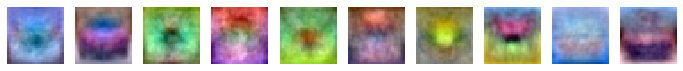

In [16]:
plot_weights_normalized_globally(weights[0].copy())

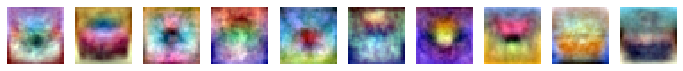

In [17]:
plot_weights_normalized_per_channel(weights[0].copy())

### Two layer network

In [18]:
model2 = Sequential([
    Dense(units=128, activation='relu', input_shape=(D,)),
    Dense(units=10, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [19]:
log = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 42us/sample - loss: 1.9622 - accuracy: 0.3060 - val_loss: 1.8133 - val_accuracy: 0.3534
Epoch 2/30
50000/50000 [==============================] - 2s 35us/sample - loss: 1.7963 - accuracy: 0.3675 - val_loss: 1.7738 - val_accuracy: 0.3748
Epoch 3/30
50000/50000 [==============================] - 2s 35us/sample - loss: 1.7268 - accuracy: 0.3911 - val_loss: 1.7195 - val_accuracy: 0.3849
Epoch 4/30
50000/50000 [==============================] - 2s 35us/sample - loss: 1.6817 - accuracy: 0.4055 - val_loss: 1.6838 - val_accuracy: 0.3990
Epoch 5/30
50000/50000 [==============================] - 2s 35us/sample - loss: 1.6512 - accuracy: 0.4177 - val_loss: 1.6391 - val_accuracy: 0.4227
Epoch 6/30
50000/50000 [==============================] - 2s 35us/sample - loss: 1.6273 - accuracy: 0.4253 - val_loss: 1.6332 - val_accuracy: 0.4259
Epoch 7/30
50000/50000 [==============================] 

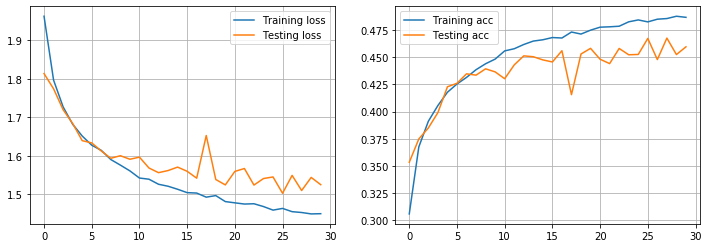

In [22]:
plot_log(log)

In [56]:
from tensorflow.keras.layers import Dropout

In [57]:
model3 = Sequential([
    Dense(units=1024, activation='relu', input_shape=(D,)),
    Dropout(0.5),
    Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

model3.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [58]:
log = model3.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=30, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 47us/sample - loss: 2.2712 - accuracy: 0.1447 - val_loss: 2.0920 - val_accuracy: 0.2419
Epoch 2/30
50000/50000 [==============================] - 2s 36us/sample - loss: 2.1001 - accuracy: 0.2002 - val_loss: 2.0152 - val_accuracy: 0.2508
Epoch 3/30
50000/50000 [==============================] - 2s 36us/sample - loss: 2.0572 - accuracy: 0.2157 - val_loss: 1.9716 - val_accuracy: 0.2773
Epoch 4/30
50000/50000 [==============================] - 2s 36us/sample - loss: 2.0247 - accuracy: 0.2367 - val_loss: 1.9736 - val_accuracy: 0.2989
Epoch 5/30
50000/50000 [==============================] - 2s 36us/sample - loss: 2.0002 - accuracy: 0.2458 - val_loss: 1.9752 - val_accuracy: 0.2981
Epoch 6/30
50000/50000 [==============================] - 2s 36us/sample - loss: 1.9797 - accuracy: 0.2529 - val_loss: 1.9530 - val_accuracy: 0.2963
Epoch 7/30
50000/50000 [==============================] 

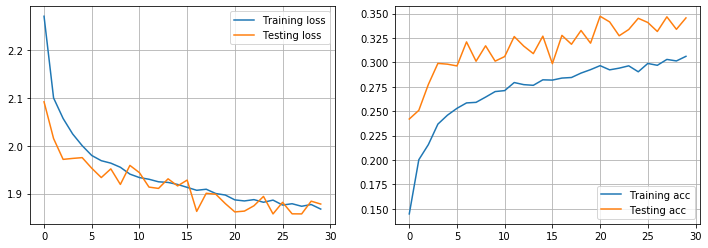

In [59]:
plot_log(log)

In [60]:
model4 = Sequential([
    Dense(units=1024, activation='relu', input_shape=(D,)),
    Dense(units=256, activation='relu'),
    Dense(units=10, activation='softmax')
])

model4.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_18 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 3,411,722
Trainable params: 3,411,722
Non-trainable params: 0
_________________________________________________________________


In [61]:
log = model4.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=30, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 62us/sample - loss: 1.9456 - accuracy: 0.3125 - val_loss: 1.7844 - val_accuracy: 0.3523
Epoch 2/30
50000/50000 [==============================] - 2s 50us/sample - loss: 1.6889 - accuracy: 0.3955 - val_loss: 1.6457 - val_accuracy: 0.4037
Epoch 3/30
50000/50000 [==============================] - 2s 50us/sample - loss: 1.6093 - accuracy: 0.4259 - val_loss: 1.6481 - val_accuracy: 0.4047
Epoch 4/30
50000/50000 [==============================] - 2s 50us/sample - loss: 1.5480 - accuracy: 0.4461 - val_loss: 1.6095 - val_accuracy: 0.4236
Epoch 5/30
50000/50000 [==============================] - 2s 50us/sample - loss: 1.5011 - accuracy: 0.4636 - val_loss: 1.4772 - val_accuracy: 0.4750
Epoch 6/30
50000/50000 [==============================] - 2s 50us/sample - loss: 1.4577 - accuracy: 0.4819 - val_loss: 1.5091 - val_accuracy: 0.4542
Epoch 7/30
50000/50000 [==============================] 

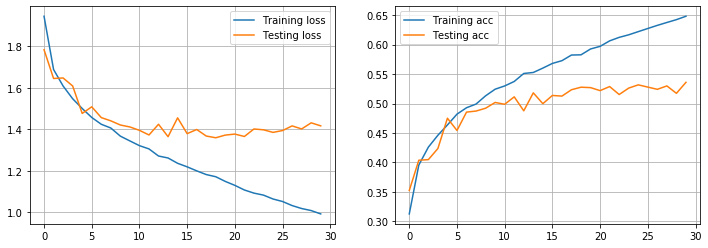

In [62]:
plot_log(log)

In [63]:
model5 = Sequential([
    Dense(units=1024, activation='relu', input_shape=(D,), 
          activity_regularizer=l2(1e-3)),
    Dense(units=256, activation='relu', activity_regularizer=l2(1e-3)),
    Dense(units=10, activation='softmax')
])

model5.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_21 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 3,411,722
Trainable params: 3,411,722
Non-trainable params: 0
_________________________________________________________________


In [64]:
log = model5.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=30, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 61us/sample - loss: 1.9867 - accuracy: 0.3088 - val_loss: 1.7928 - val_accuracy: 0.3664
Epoch 2/30
50000/50000 [==============================] - 3s 50us/sample - loss: 1.7948 - accuracy: 0.3662 - val_loss: 1.7791 - val_accuracy: 0.3711
Epoch 3/30
50000/50000 [==============================] - 3s 51us/sample - loss: 1.7391 - accuracy: 0.3883 - val_loss: 1.6804 - val_accuracy: 0.4173
Epoch 4/30
50000/50000 [==============================] - 3s 50us/sample - loss: 1.6811 - accuracy: 0.4093 - val_loss: 1.7189 - val_accuracy: 0.3956
Epoch 5/30
50000/50000 [==============================] - 3s 50us/sample - loss: 1.6601 - accuracy: 0.4179 - val_loss: 1.6569 - val_accuracy: 0.4222
Epoch 6/30
50000/50000 [==============================] - 3s 50us/sample - loss: 1.6416 - accuracy: 0.4246 - val_loss: 1.6514 - val_accuracy: 0.4157
Epoch 7/30
50000/50000 [==============================] 

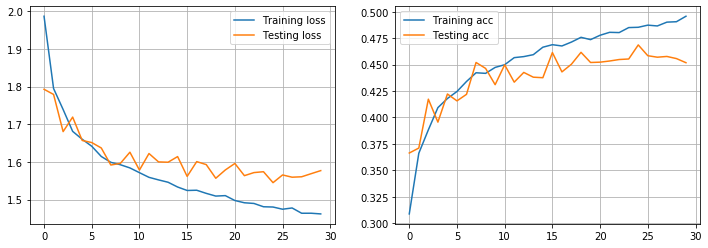

In [65]:
plot_log(log)

### Comment
The best model so far was a MLP with 3 layers, with 1024, 256, then 10 units, using relu as an activation function for the hidden layers and softmax for the output layer.

<a id='ex03'></a>

## Exercise 3

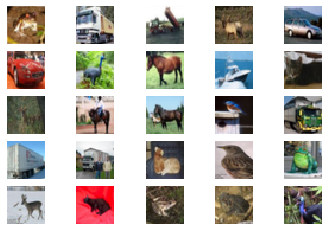

Class count 10
(50000, 32, 32, 3)


In [12]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k])
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

show_imgs(X_train)

n_classes = np.unique(y_train).shape[0]
print('Class count {}'.format(n_classes))
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape)
y_train, y_test = utils.to_categorical(y_train), utils.to_categorical(y_test)

### Model configuration experimenting results

| Layers | loss | validation_loss | accuracy | validation_accuracy | epochs |
|--------|------|-----------------|----------|---------------------|--------|
| C2D(f=64, ks=(5,5))<br>C2D(f=32, ks=(5,5))<br>MP2D((2,2))<br>Flatten()<br>Dense(u=10) |0.1251|2.8703|0.9551|0.6293|50|
|C2D(f=64, ks=(5,5))<br>C2D(f=32, ks=(5,5))<br>MP2D((4,4))<br>Flatten()<br>Dense(u=10) |0.7854 |0.9593|0.7292|0.6779|20|
|C2D(f=64, ks=(3,3))<br>C2D(f=32, ks=(3,3))<br>MP2D((4,4))<br>Flatten()<br>Dense(u=10) |0.7348|0.9452|0.7486|0.6795|20|
|C2D(f=64, ks=(3,3))<br>C2D(f=32, ks=(3,3))<br>MP2D((4,4))<br>Flatten()<br>Dense(u=128)<br>Dense(u=10) |0.4567|0.9319|0.8424|0.7129|20|
|C2D(f=64, ks=(3,3))<br>C2D(f=32, ks=(3,3))<br>MP2D((4,4))<br>Flatten()<br>Dense(u=128,activity_recularizer=l2(1e-2))<br>Dense(u=10) |0.3962|0.9315|0.9161|0.7225|20|

where not mentionned other we used the `relu` activation function, except for the last Dense layer. There we used `softmax`.

All models were compiled with `loss='categorical_crossentropy', optimizer='adam'` and batch size 128. Some trials with greater batch sizes have not improved the result. The best model is implemented below.

In [136]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.regularizers import l1, l2

In [150]:
cnn = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3,), activation='relu'),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((4, 4)),
    
    # Conv2D(32, kernel_size=(3,3), activation='relu'),
    Flatten(),
    Dense(units=128, activation='relu', activity_regularizer=l2(1e-2)),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])

cnn.compile(loss='categorical_crossentropy', optimizer='adam',
           metrics=['accuracy'])
cnn.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 128)               102528    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 10)              

In [151]:
log = cnn.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=20, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 147us/sample - loss: 1.7895 - accuracy: 0.3891 - val_loss: 1.4978 - val_accuracy: 0.5090
Epoch 2/20
50000/50000 [==============================] - 7s 132us/sample - loss: 1.4042 - accuracy: 0.5398 - val_loss: 1.2975 - val_accuracy: 0.5854
Epoch 3/20
50000/50000 [==============================] - 7s 132us/sample - loss: 1.2410 - accuracy: 0.5991 - val_loss: 1.1747 - val_accuracy: 0.6245
Epoch 4/20
50000/50000 [==============================] - 7s 136us/sample - loss: 1.1436 - accuracy: 0.6317 - val_loss: 1.1366 - val_accuracy: 0.6350
Epoch 5/20
50000/50000 [==============================] - 7s 144us/sample - loss: 1.0764 - accuracy: 0.6512 - val_loss: 1.0433 - val_accuracy: 0.6669
Epoch 6/20
50000/50000 [==============================] - 7s 145us/sample - loss: 1.0292 - accuracy: 0.6688 - val_loss: 1.0208 - val_accuracy: 0.6727
Epoch 7/20
50000/50000 [==========================

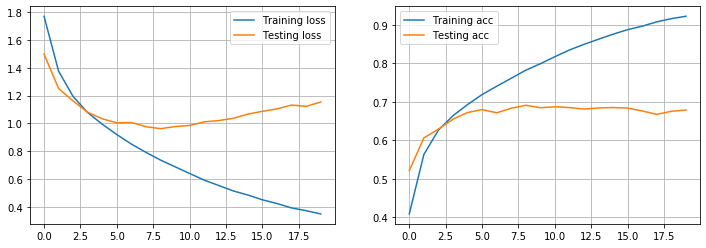

In [148]:
plot_log(log)

In [45]:
y_test.argmax(axis=1)

array([3, 8, 8, ..., 5, 1, 7])

In [20]:
pred = cnn.predict_classes(X_test, verbose=0)
confusion_matrix(y_test.argmax(axis=1), pred)

array([[685,  24,  60,  28,  17,  12,  12,  20,  99,  43],
       [ 42, 740,   9,  13,   4,   5,   6,   9,  36, 136],
       [ 83,  11, 474,  87, 117,  72,  65,  57,  18,  16],
       [ 33,  16,  81, 448,  72, 176,  79,  49,  29,  17],
       [ 27,   6,  89,  83, 573,  57,  57,  88,  15,   5],
       [ 21,   5,  78, 205,  58, 491,  28,  86,  13,  15],
       [ 15,   8,  54, 102,  68,  39, 676,  16,   8,  14],
       [ 25,   5,  46,  39,  81,  64,   8, 701,   6,  25],
       [ 88,  32,  12,  13,   8,   8,  10,   9, 780,  40],
       [ 55,  97,  13,  19,  14,  14,   7,  20,  36, 725]])